# <font color="#3A40A2">📘 5. Combinando Aprendizaje No Supervisado y Aprendizaje Supervisado</font>

**Materia: Ciencia de Datos aplicada a los Negocios - Universidad de San Andrés**

**Autor: [Lucas BALDEZZARI](https://www.linkedin.com/in/lucasbaldezzari/)**

**2025**

> Este material es para fines educativos y no debe ser utilizado para fines comerciales. El contenido pertenece a la *Universidad de San Andrés* y no debe ser reproducido sin el permiso explícito de la institución y del autor de este repositorio quien es [LUCAS BALDEZZARI](https://www.linkedin.com/feed/).
---


## <font color="#004eb3">Temas de la Colab</font>

- Para esta clase aplicaremos los conceptos vistos en las clases anteriores para combinar técnicas de Aprendizaje No Supervisado y Aprendizaje Supervisado. En particular, veremos cómo utilizar técnicas de reducción de dimensionalidad para mejorar el rendimiento de modelos supervisados.

Es importante prestar atención a los siguientes íconos o emojis que aparezcan a lo largo de la Colab.

- 📘 **Teoría**: Conceptos teóricos.
- 📚 **Lectura**: Material adicional que puedes consultar para profundizar en el tema.
- 📊 **Ejemplo**: Ejemplo para demostrar y/o reforzar conceptos.
- 🔗 **Enlace**: Recursos externos que puedes visitar para obtener más información.
- ❓ **Pregunta**: Preguntas disparadas a lo largo del contenido para reflexionar sobre los ejemplos y conceptos tratados.
- 💻 **Código**: Indica que la celda de abajo es una celda con código y debe ser ejecutada para ver su contenido.
- 📝 **Respuestas**: Respuestas a las preguntas planteadas.

### **<font color="#0205d6">Integrantes del grupo</font>**

Por favor, colocar los nombres de los/as integrantes del grupo que trabajó en esta Colab.
- Integrante 1
- Integrante 2
- Integrante 3

---

💻 Por favor, ejecuta la celda de abajo para clonar el repositorio y poder trabajar 💻

In [76]:
## **** CÓDIGO PYTHON ****

##Clonamos el repositorio para poder usar las funciones
## Esperar unos segundos hasta ver un 100% de descarga
# !git clone https://github.com/lucasbaldezzari/cdan.git

##importamos las funciones a usar
from funciones.combinations import *
# from funciones.utils import * ##importo funciones a usar

# 📊 **<font color="#d6b302">1. LDA vs PCA para reducción de dimensionalidad y clasificación</font>**

En este primer ejercicio vamos a usar LDA y PCA para reducir dimensiones y comparar la performance de un SVM en ambos casos.

Usaremos el set de datos llamado *Wine*, donde puede obtenerse información del mismo en [Wine](https://archive.ics.uci.edu/dataset/109/wine) y [Wine recognition dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset) que contiene 13 features y 3 clases. El objetivo es predecir la clase a la que pertenece cada muestra.

Este set de datos posee 178 muestras. Las características son resultados de análisis químicos de diferentes vinos. La variable objetivo es la clase del vino, que puede ser 1, 2 o 3.

#### <font color="#3A40A2">📘 Repaso teórico 📘</font>

- PCA realiza la reducción de dimensionalidad maximizando la varianza de los datos. En la mayoría de los casos, la **estandarización** de las características es necesaria antes de aplicar PCA.
- LDA realiza la reducción de dimensionalidad maximizando la separabilidad de clases de los conjuntos de datos de clasificación.
- PCA no requiere etiquetas de clase. Por esta razón, podemos usarlo con clasificación, regresión e incluso con datos no etiquetados.
- LDA requiere etiquetas de clase. Por lo tanto, se utiliza con conjuntos de datos de clasificación.
- PCA encuentra un conjunto de características no correlacionadas en un espacio de menor dimensión. Esto significa que las nuevas características (componentes principales) son combinaciones lineales de las características originales.
- Como hemos visto, LDA se puede utilizar tanto para tareas supervisadas como no supervisadas. PCA solo se puede utilizar para la reducción de dimensionalidad no supervisada.
- El número máximo de componentes que PCA puede encontrar es igual al número de características de entrada (dimensionalidad original) del conjunto de datos. Sin embargo, en general queremos encontrar un número más bajo de componentes que capture la mayor cantidad posible de la varianza en los datos originales.
- El número máximo de componentes que LDA puede encontrar es igual al número de clases menos uno en el conjunto de datos de clasificación. Por ejemplo, si solo hay 3 clases en el conjunto de datos, LDA puede encontrar un máximo de 2 componentes.
- Finalmente, **LDA es más eficaz que PCA para conjuntos de datos de clasificación porque LDA reduce la dimensionalidad de los datos maximizando la separabilidad de clases. Es más fácil trazar límites de decisión para datos con máxima separabilidad de clases.** Esto último aplica si tenemos un conjunto de datos con etiquetas, claro.

💻 Primer análisis 💻

Vamos a realizar un resumen de las características del dataset y a visualizar las primeras filas para entender mejor su estructura.

In [77]:
entrenamiento, testeo = getWineDF()
entrenamiento.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.979085,2.373521,2.360845,19.473239,100.443662,2.289085,2.002113,0.368028,1.608028,5.057606,0.956380,2.592817,734.894366,0.964789
std,0.820116,1.143934,0.279217,3.454792,14.650793,0.637715,1.004170,0.128269,0.583656,2.330917,0.234101,0.722141,302.323595,0.775621
min,11.030000,0.890000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.420000,1.740000,0.480000,1.270000,278.000000,0.000000
25%,12.332500,1.615000,2.210000,17.200000,88.250000,1.725000,1.125000,0.270000,1.250000,3.220000,0.782500,1.837500,502.500000,0.000000
50%,13.010000,1.875000,2.360000,19.200000,98.000000,2.310000,2.075000,0.340000,1.555000,4.600000,0.965000,2.775000,660.000000,1.000000
75%,13.677500,3.135000,2.540000,21.500000,107.000000,2.800000,2.842500,0.470000,1.967500,6.122500,1.120000,3.170000,932.750000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1547.000000,2.000000


💻 Cantidades de observaciones por clases 💻

Ejecuta la celda para ver la cantidad de observaciones por clases y el porcentaje de cada una respecto del total de observaciones

In [78]:
print("****************************************")
print("Cantidad de observaciones por clase:")
print(entrenamiento['target'].value_counts())
print("****************************************", end="\n\n")

print("****************************************")
print("Porcentaje de observaciones por clase:")
print(entrenamiento['target'].value_counts(normalize=True) * 100)
print("****************************************")

****************************************
Cantidad de observaciones por clase:
target
1    57
0    45
2    40
Name: count, dtype: int64
****************************************

****************************************
Porcentaje de observaciones por clase:
target
1    40.140845
0    31.690141
2    28.169014
Name: proportion, dtype: float64
****************************************


---❓---

1. ¿Cuántas features tiene el dataset? ¿Los rangos de cada feature son similares? *(Obligatoria)*
2. ¿Es un dataset balanceado?
3. ¿Qué deberíamos hacer si las features tienen rangos muy diferentes? *(Obligatoria)*
4. ¿Qué consecuencias puede tener que el dataset no esté balanceado desde el punto de vista de la clasificación? *(Obligatoria)*
6. ¿Qué deberíamos hacer si la cantidad de observaciones por clase es muy diferente?

---❓---

📝 *En esta celda podes escribir las respuestas a las preguntas obligatorias 1, 2 y 4* 📝


1. El dataset tiene...

### 📊 **<font color="#d6b302">1.1 Eligiendo algunas características para clasificar</font>**

Antes de utilizar PCA o LDA para reducir dimensiones, vamos a explorar un poco el dataset. Para esto, vamos a crear un mapa de calor de las correlaciones entre las features y un pairplot para visualizar las relaciones entre algunas features.

💻 Por favor, ejecuta las siguientes celdas de código 💻

In [79]:
# correlationForWine()

No se han especificado features, se usarán las siguientes: ['alcohol', 'malic_acid', 'magnesium', 'color_intensity', 'proline']


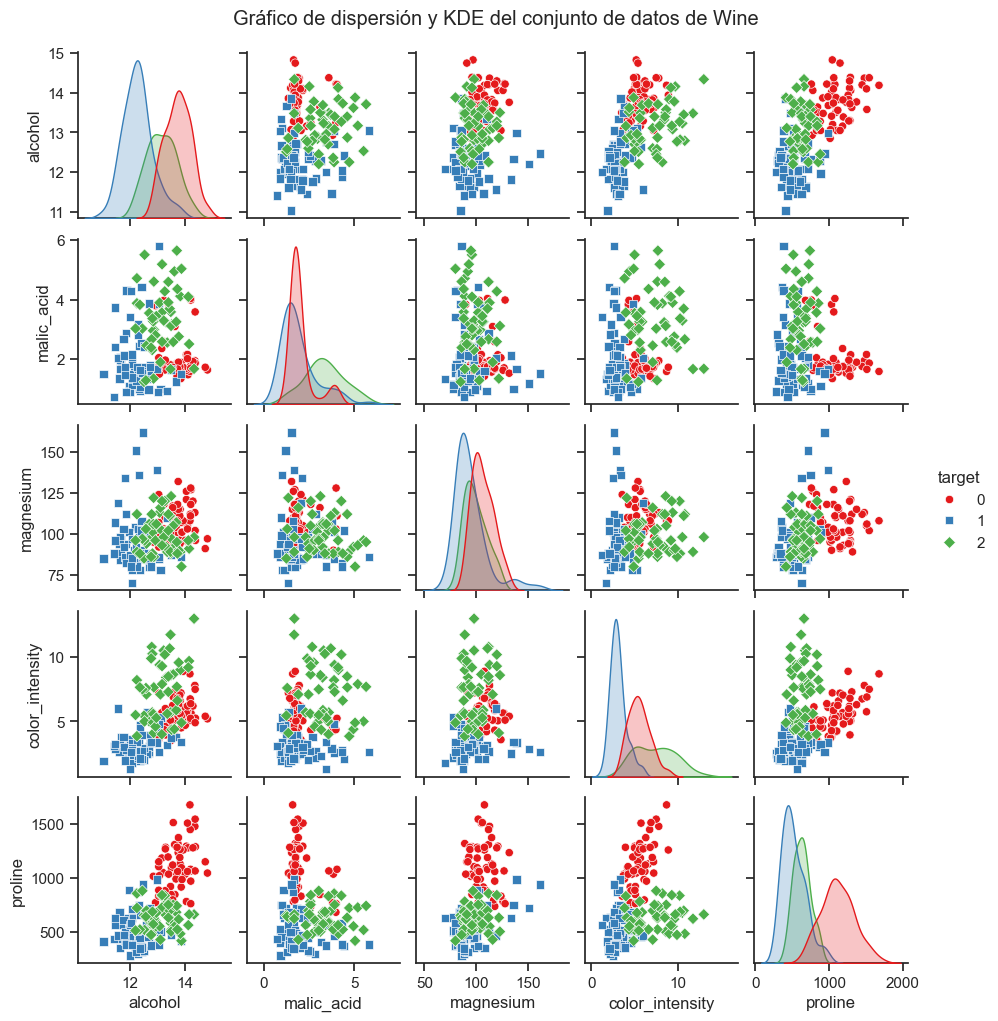

In [80]:
pairPlotofWine(features=None)

📘

- El gráfico anterior se ha generado con la función [*pairplot()*](https://seaborn.pydata.org/generated/seaborn.pairplot.html) de la librería [Seaborn](https://seaborn.pydata.org/) y es muy útil para visualizar las relaciones entre múltiples variables en un solo gráfico. El gráfico se divide en filas y columnas, donde cada fila y columna representa una variable diferente del conjunto de datos.
- A su vez, la diagonal principal del gráfico muestra la distribución de cada variable individualmente.
- Finalmente, los gráficos fuera de la diagonal muestran las relaciones entre pares de variables, en este caso, hemos graficado las relaciones entre las features y cómo se distribuyen las clases de vino en función de esas features.

📘

---❓---

6. Si tuvieras que elegir sólo 2 features para clasificar las clases de vino, ¿cuáles elegirías? ¿Por qué? *(Obligatoria)*

---❓---

📝 *En esta celda podes escribir la respuesta a la pregunta obligatoria número 6* 📝


6. Las features que elegiría serían...

💻 

A partir de tu analisis, elige 2 features que usaremos para clasificar las clases de vino utilizando un SVM.

Para esto, reemplaza donde dice `None` en las variables `feature1` y `feature2` por las características que hayas elegido en la celda de código de abajo y ejecutala para ver la frontera de decisión del clasificador SVM utilizando esas 2 features.

<font color="#d6023a">**IMPORTANTE: Debes escribir los nombres de las features exactamente como figura en el gráfico y además debe estar entre comillas dobles o simples**</font>

Ejemplo:

```python
feature1 = "malic_acid"
feature2 = "magnesium"
```

💻

Cantidad de datos para set de testeo y entrenamiento: 72, 106
Accuracy: 0.8333
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        26
           1       0.89      0.93      0.91        27
           2       0.76      0.68      0.72        19

    accuracy                           0.83        72
   macro avg       0.82      0.82      0.82        72
weighted avg       0.83      0.83      0.83        72



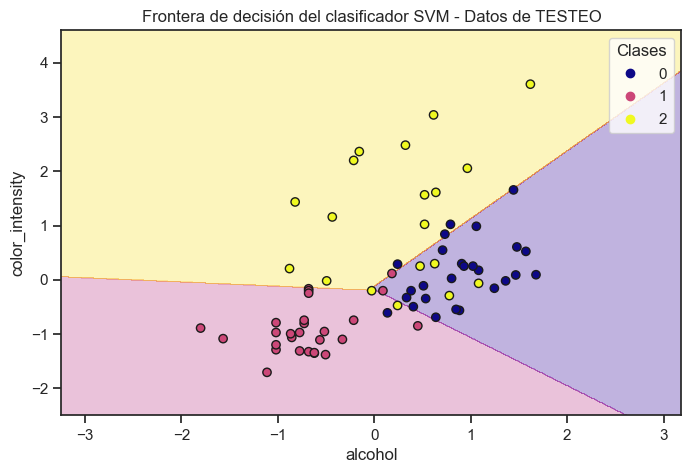

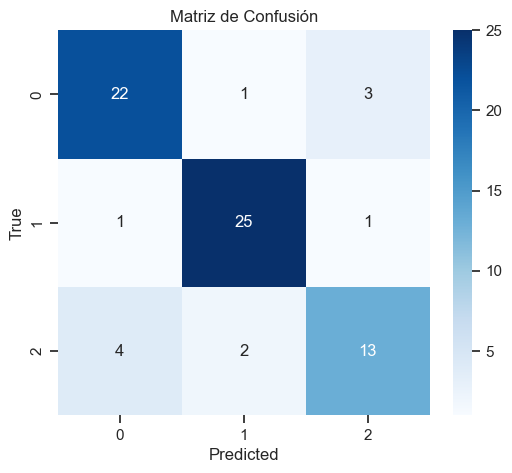

In [81]:
feature1 = None
feature2 = None
feature1 = "alcohol"
feature2 = "color_intensity"
classifyWineFeatures(feature1, feature2, seed=42, figsize=(8,5))

---❓---

7. ¿Qué tan bien funciona el clasificador SVM con las features que elegiste? ¿Crees que podrías mejorar la performance eligiendo otras features? (Podes probar en la celda anterior cambiando las features).
8. ¿Qué clases son las que más se confunden entre sí?

---❓---

### 📊 **<font color="#d6b302">1.2 Usando PCA y SVM para clasificar el set WINE</font>**

Ahora vamos a usar PCA para reducir las 13 dimensiones del dataset a 2 dimensiones y luego entrenar un clasificador SVM con esas 2 dimensiones para ver si podemos mejorar la clasificación.

💻 Corre la celda debajo para evaluar el rendimiento del clasificador SVM con las nuevas características a partir de PCA. 💻


Varianza explicada por las 2 componentes principales: 0.5724
Cantidad de datos para set de testeo y entrenamiento: 72 y 106, respectivamente
Accuracy: 0.9583
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.90      0.95        31
           2       0.95      1.00      0.97        19

    accuracy                           0.96        72
   macro avg       0.96      0.97      0.96        72
weighted avg       0.96      0.96      0.96        72



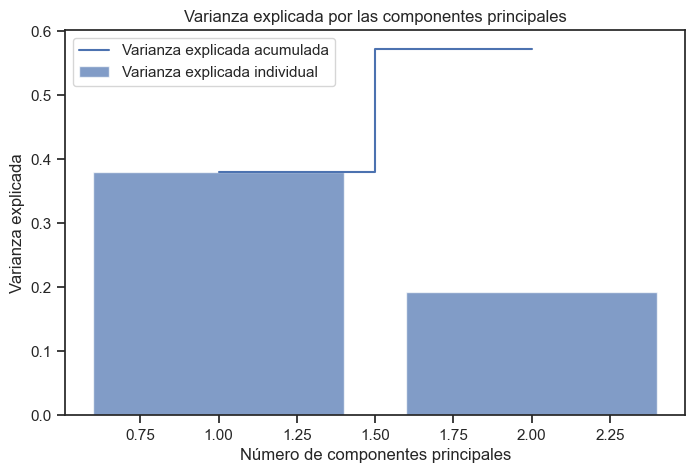

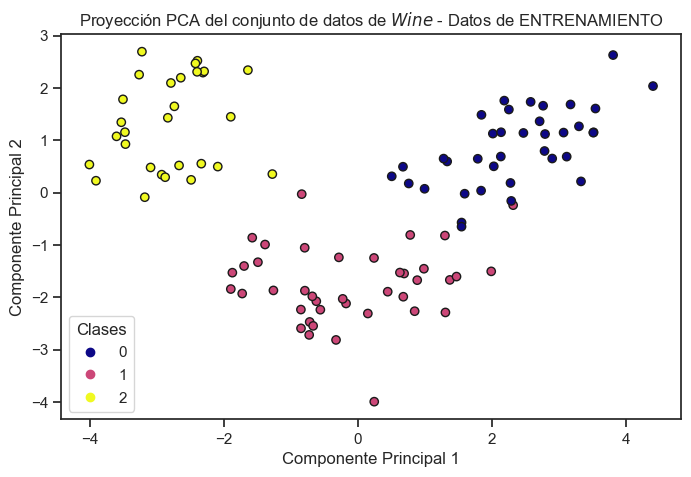

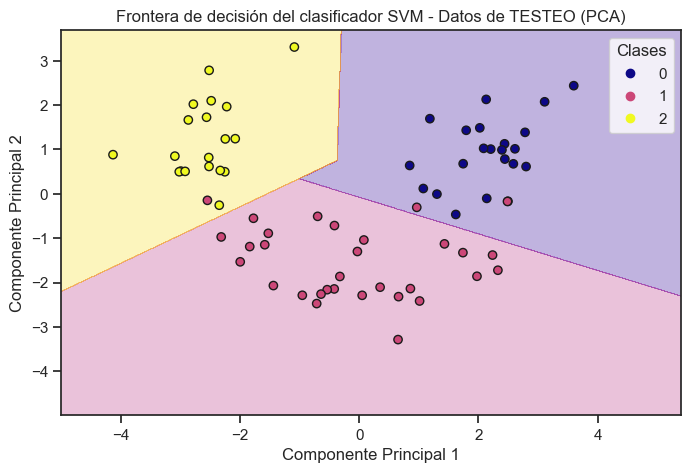

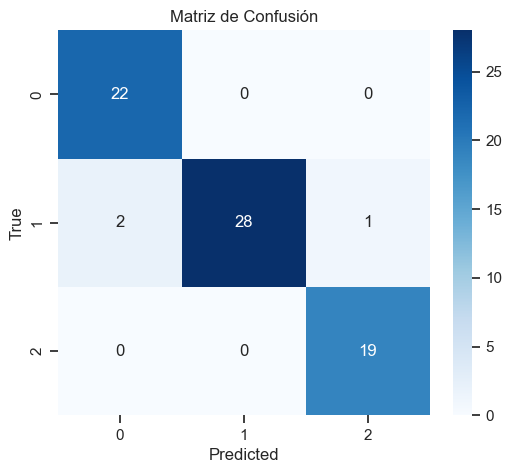

In [82]:
n_comps = 2
classifyWinePCA(n_comps)

Podemos ver que utilizando las primeras dos componentes logramos una accuracy global de alrededor del $96\%$. Esto es bastante bueno considerando que estamos usando solo dos dimensiones en lugar de las 13 originales. Hemos visto también que la cantidad de varianza explicada usando sólo dos componentes es de casi el 60%, lo cual es significativo. **Esto indica que estas dos componentes principales capturan una gran parte de la información original del conjunto de datos.**

---❓---

9. ¿Crees que el rendimiento del clasificador mejoraría su usaramos más componentes principales en lugar de 2? ¿Por qué?
10. ¿Siempre mejoraría el rendimiento al aumentar la cantidad de componentes principales?

---❓---

### 📊 **<font color="#d6b302">1.3 Usando LDA y SVM para clasificar el set WINE</font>**

Ahora vamos a usar LDA para reducir las 13 dimensiones del dataset a 2 dimensiones y luego entrenar un clasificador SVM con los datos proyectados en estas nuevas dimensiones para ver si mejoramos respecto a PCA y la elección de features de los apartados 1.1 y 1.2.

💻 Ejecuta la celda debajo para evaluar el rendimiento del clasificador SVM con las nuevas características a partir de LDA. 💻

Cantidad de datos para set de testeo y entrenamiento: 72 y 106, respectivamente
Accuracy: 0.9722
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.94      0.97        31
           2       0.90      1.00      0.95        19

    accuracy                           0.97        72
   macro avg       0.97      0.98      0.97        72
weighted avg       0.97      0.97      0.97        72



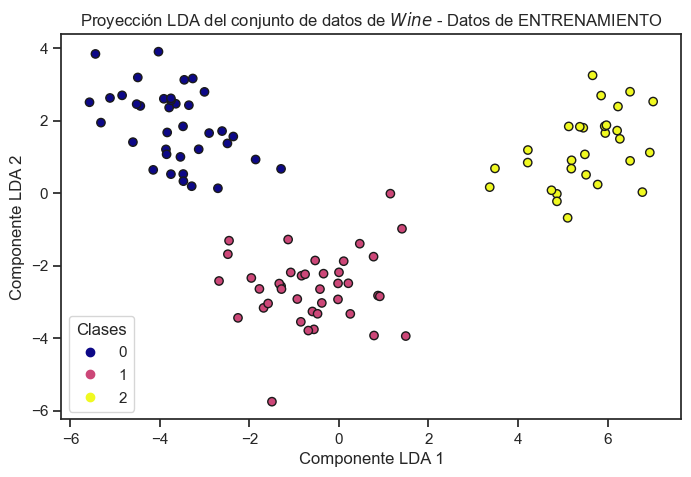

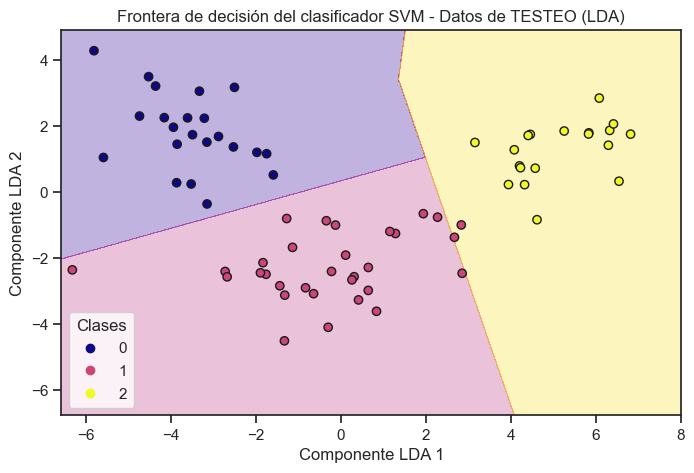

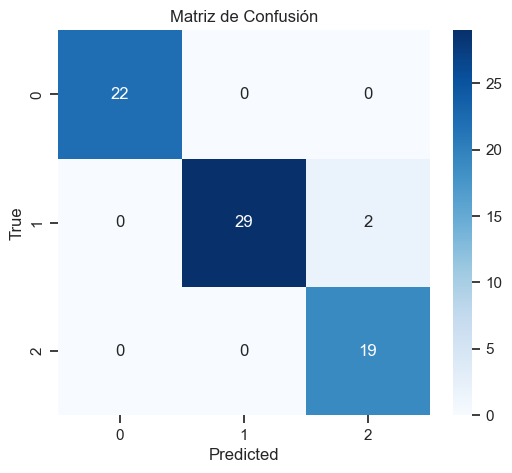

In [83]:
classifyWineLDA(show_variance=False, figsize=(8,5))

---❓---

10. Para el set de entrenamiento, ¿con qué método se clasificó mejor: ¿PCA, LDA o la elección de features? ¿Por qué? *(Obligatoria)*

---❓---

📝 *En esta celda podes escribir la respuesta a la pregunta obligatoria número 10* 📝


10. Para el set de entrenamiento, el método que mejor separó los datos fue... Debido a...

---

# 📊 **<font color="#d6b302">2. Aplicando técnicas no supervisadas para generar categorías y clasificar datos nuevos</font>**

Vamos a usar un dataset que tiene las siguientes features:
- media_visitas_diarias
- precio_unitario
- unidades_vendidas_mensuales
- valoracion_media

<font color="#0059d6">**La idea es generar categorías de productos a partir de estas features para luego entrenar un modelo de clasificación que nos permita predecir la categoría de un producto nuevo.**</font>

<font color="#d6023a">**NOTAS:**</font>

1. Para este ejercicio se dispone de un *set de entrenamiento* y un *set de testeo*.
2. El set de entrenamiento no tiene etiquetas, de hecho, debemos encontrarlas. Se utilizará para encontrar los segmentos utilizando técnicas de clustering.
3. Todo el análisis para segmentar los datos se realizará en el set de entrenamiento.
4. Una vez segmentados los datos, se asignarán las etiquetas encontradas a los datos del set de testeo.
5. Luego, se entrenarán un par de modelos de clasificación utilizando las features y las etiquetas encontradas en el set de entrenamiento.
6. Finalmente, evaluaremos el rendimiento del modelo en el set de testeo. **IMPORTANTE:** El set de testeo sí tiene etiquetas, por lo tanto podremos evaluar el rendimiento del modelo comparando las etiquetas reales con las predichas por el modelo.

### 📊 **<font color="#d6b302">2.1 Eligiendo características para aplicar técnicas no supervisadas</font>**

En primer lugar, vamos a generar un pairplot para determinar qué características parecen segmentar mejor los datos. Nos ayudaremos con estas features, gráficos de dispersión, dendograma y algunas métricas para intentar determinar la cantidad óptima de clusters.

💻 Ejecuta la celda de abajo para ver el pairplot de los datos 💻

NOTA: En la función `pairPlotofIrTransformed()` podes elegir si aplicar o no el escalado estándar a las características. Para esto, simplemente tenes que pasar el parámetro `standard_scaler=True` o `standard_scaler=False`.

Si aplicas standard scaler, las features se escalarán para que tengan media 0 y desviación estándar 1. Esto es útil cuando las features tienen diferentes unidades o rangos, ya que ayuda a que todas las features contribuyan de manera equitativa al análisis.

La fórmula para estandarizar una característica es:

$$ z = \frac{(X - \mu)}{\sigma} $$

Donde $z$ es el valor estandarizado, $X$ es el valor original de la característica, $\mu$ es la media de la característica y $\sigma$ es la desviación estándar de la característica.

No se han especificado features, se usarán las siguientes: ['media_visitas_diarias', 'precio_unitario', 'unidades_vendidas_mensuales', 'valoracion_media']


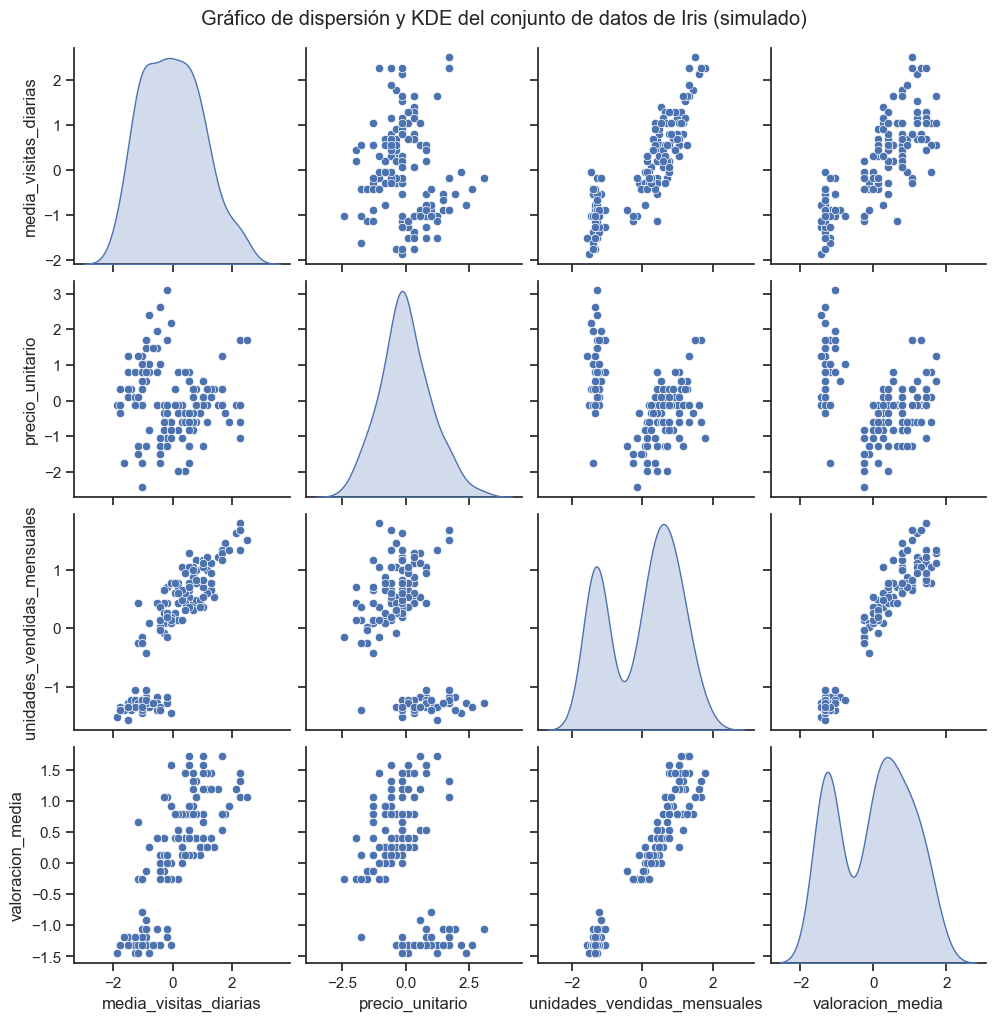

In [84]:
pairPlotofIrdataset(standard_scaler = True)

---❓---

11. ¿Hay alguna diferencia en la distribución o rangos de valores que toman las features cuando se escala o no se escala? ¿Es correcto lo que ves en uno u otro caso?
12. ¿Qué variables parecen segmentar mejor los datos?

---❓---

💻 

A partir del análisis del pairplot debes elegir dos variables para analizar cuantos grupos podríamos formar. Primero vamos a analizar información usando K-means.

De momento, **NO** vamos a aplicar clustering, sólo queremos analizar los datos y usar algunas métricas para intentar inferir la cantidad óptima de clusters.

<font color="#d6023a">**IMPORTANTE: Para que la celda de abajo se ejecute adecuadamente, debes escribir los nombres de las features exactamente como figura en el gráfico y además debe estar entre comillas dobles o simples**</font>

Ejemplo:

```python
feature1 = "media_visitas_diarias"
feature2 = "unidades_vendidas_mensuales"
```
💻

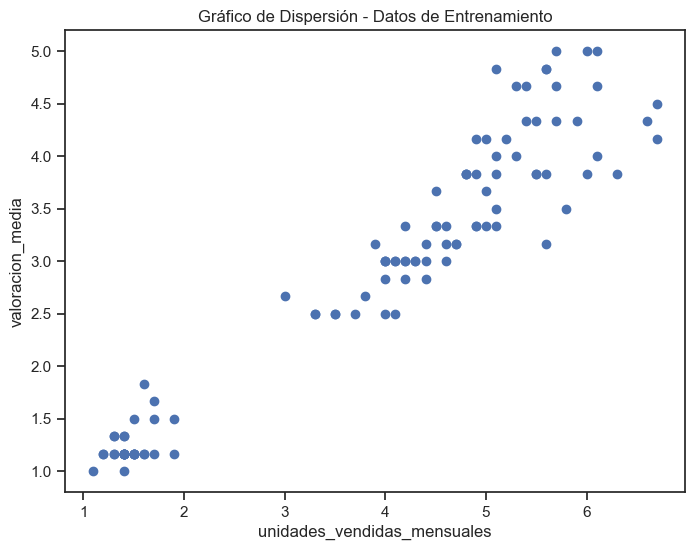

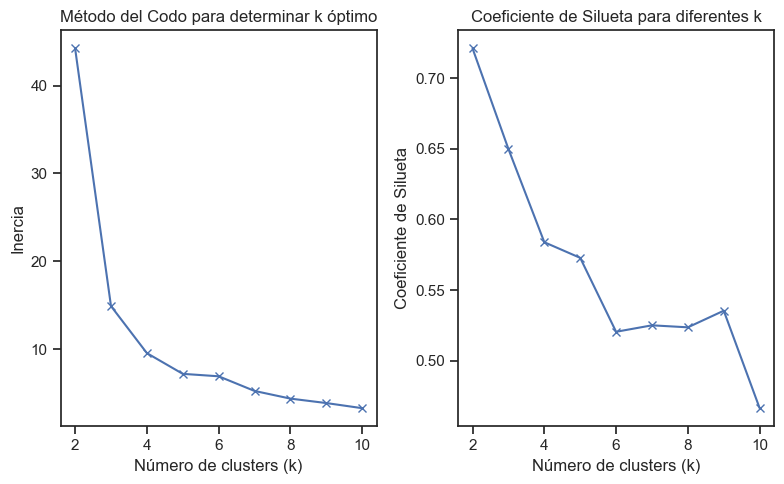

In [85]:
feature1 = None# acá pone la feature 1
feature2 = None# acá pone la feature 2
feature1 = "unidades_vendidas_mensuales" #precio_unitario
feature2 = "valoracion_media" #media_visitas_diarias
kmeansIrdatasetAnalysis(feature1, feature2, figsize=(8, 5))

💻 

Ahora vamos a usar un dendograma para complementar el análisis anterior. El dendograma nos ayudará a visualizar cómo se agrupan las muestras en función de las características seleccionadas y a intentar inferir la cantidad óptima de clusters.

<font color="#d6023a">**IMPORTANTE: Tene en cuenta que hay que escribir los nombres de las features exactamente como figura en el gráfico y además debe estar entre comillas dobles o simples**</font>

💻

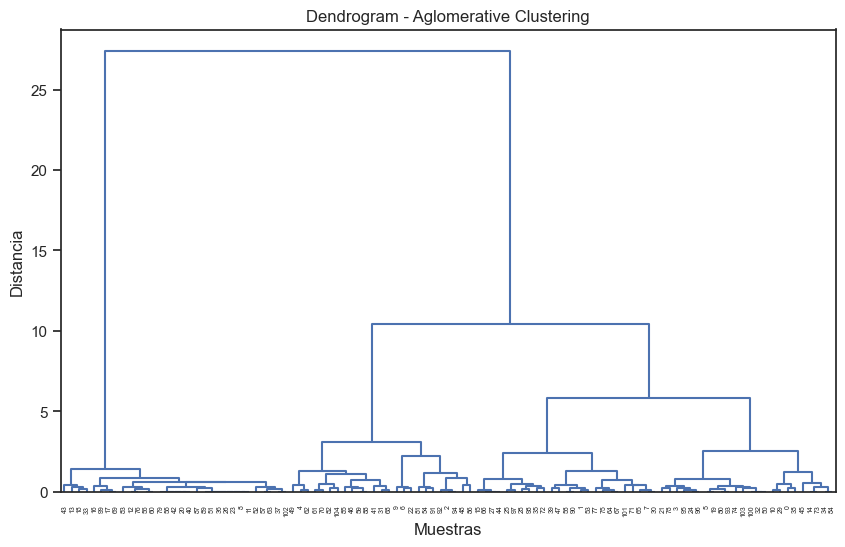

In [86]:
feature1 = None# acá pone la feature 1
feature2 = None# acá pone la feature 2
feature1 = "unidades_vendidas_mensuales" #precio_unitario
feature2 = "valoracion_media" #media_visitas_diarias
deondoIrdataset(feature1, feature2, used_all_features = False)

### 📊 **<font color="#d6b302">2.2 Generando categorías</font>**

Con los gráficos y métricas anteriores, estamos en condiciones de elegir la cantidad de cluster o *categorías* a partir de los datos.

Vamos a aplicar K-means y clustering jerárquico para generar las categorías y a partir de los datos segmentados vamos a analizar las métricas para decidir qué técnica usar para generar las categorías definitivas.

Encima de cada gráfico vas a ver algunas métricas que te ayudarán a decidir la cantidad de clusters y la técnica a usar.

💻 

Ejecuta la celda de abajo para aplicar K-means y clustering jerárquico y ver las métricas asociadas a cada técnica. Utilizá las features que elegiste en el *apartado 2.1*. Además, en el caso de K-means, vas a tener que especificar una cantidad de cluster, para esto, reemplazá la palabra `None` en la variable `n_clusters` por la cantidad de clusters que creas conveniente.

Por otro lado recorda que <font color="#d6023a">**el nombre de las categorías dentro de `feature1` y `feature2` se deben escribir exactamente como figuran en el gráfico y además debe estar entre comillas dobles o simples**</font>.

Ejemplo de uso:

```python
n_clusters = 3
umbral_dendo = 7
feature1 = "media_visitas_diarias"
feature2 = "unidades_vendidas_mensuales"
```

💻

Métricas de Evaluación para KMeans (k=3):
 - Silhouette Score: 0.6499
 - Davies-Bouldin Score: 0.48
 - Inertia: 14.9113


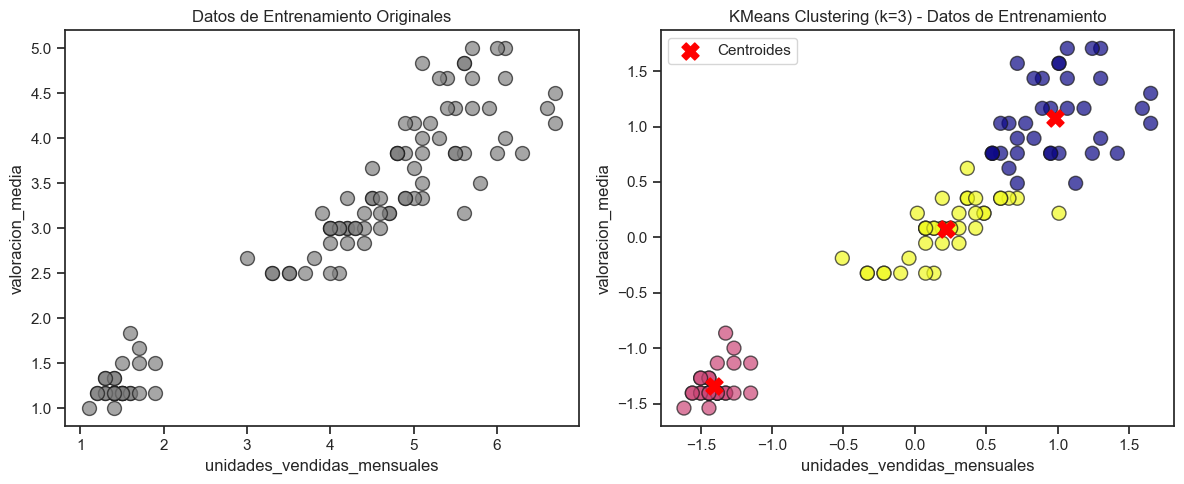

Cantidad de clusters formados con umbral 4: 3
Métricas de Evaluación para Agglomerative Clustering (umbral=4):
 - Silhouette Score: 0.6448
 - Davies-Bouldin Score: 0.4861


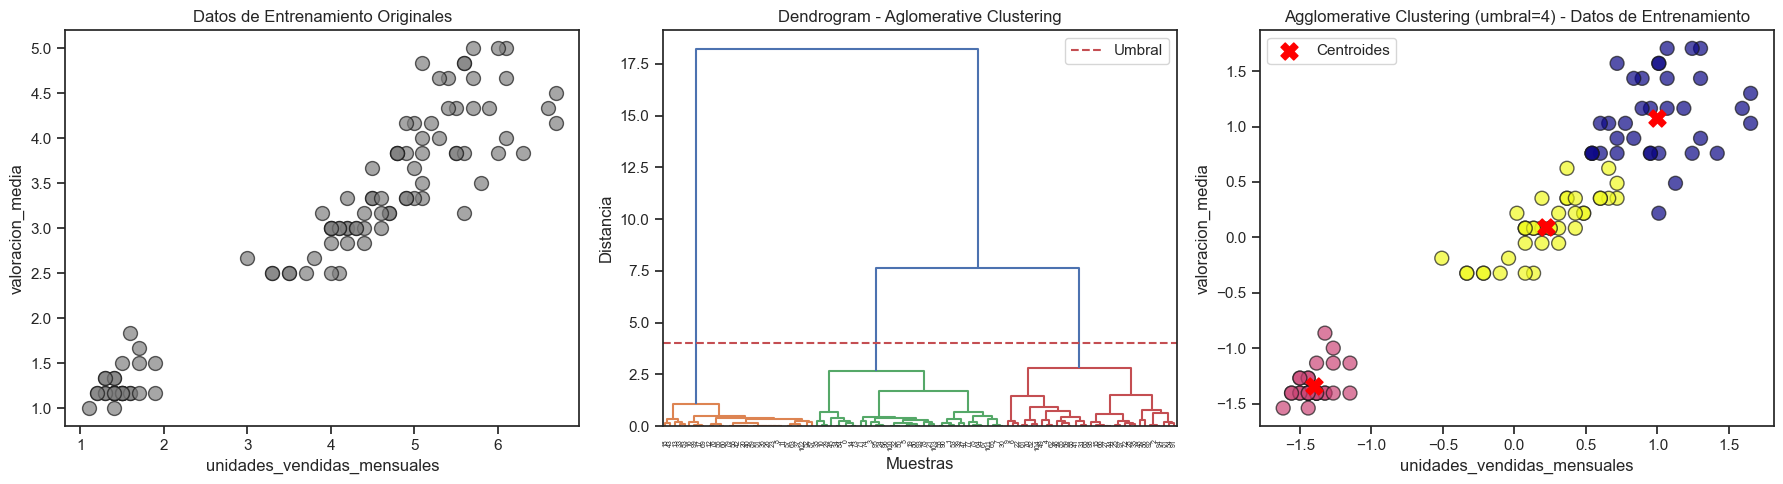

In [87]:
n_clusters = 3
feature1 = None# acá pone la feature 1
feature2 = None# acá pone la feature 2
umbral_dendo = 4

feature1 = "unidades_vendidas_mensuales" #precio_unitario
feature2 = "valoracion_media" #media_visitas_diarias

kmeansIrdatasetClustering(n_clusters=n_clusters, feature1=feature1, feature2=feature2)
jerarquicoIrdatasetClustering(feature1=feature1, feature2=feature2, umbral=umbral_dendo)

---❓---

13. ¿Qué técnica usarías para generar las categorías? ¿Por qué? *(Obligatoria)*
14. ¿Qué cantidad de clusters elegirías? ¿Por qué? *(Obligatoria)*

---❓---

📝 *En esta celda podes escribir las respuestas a las preguntas obligatorias número 13 y 14* 📝

13. La técnica que usaría para generar las categorías es...
14. La cantidad de clusters que elegiría es...

### 📊 **<font color="#d6b302">2.3 Entrenando un clasificador</font>**

Ahora que hemos generado las categorías, vamos a entrenar un par de clasificadores para predecir la categoría de un producto nuevo.

Usaremos un Linear Discriminant Analysis (LDA) ya que es un clasificador lineal simple y efectivo para problemas de clasificación multiclase y un SVM.

Usaremos los datos de entrenamiento con las categorías generadas para entrenar ambos clasificadores y luego evaluaremos su rendimiento en el set de testeo.

#### <font color="#3A40A2">📘 Resumen de lo realizado 📘</font>

Hasta ahora, hemos realizado los siguientes pasos:

1. Analizamos el dataset de entrenamiento y seleccionamos dos características que parecen segmentar bien los datos.
2. Usamos K-means y clustering jerárquico para generar categorías a partir de las características seleccionadas.
3. Elegimos la técnica y la cantidad de clusters para generar las categorías definitivas.

#### <font color="#3A40A2">📘 Preparando los datos  de testeo 📘</font>

*¿Debemos preparar los datos de testeo de alguna manera especial?*

<font color="#3aa256">**¡SI!**</font>, lo que debemos hacer es aplicar el mismo pre-procesamiento inicial que aplicamos a los datos de entrenamiento, en este caso, estandarizar las features. No obstante, si hubiéramos realizado más procesamientos, también deberíamos aplicarlos aquí.

Luego, cada observación del set de testeo se clasificará en una de las categorías generadas a partir del set de entrenamiento. Paso siguiente, evaluaremos el rendimiento del clasificador comparando las etiquetas reales con las predichas por el modelo.

Sigamos.

#### 📊 **<font color="#d6b302">💻 2.3.1. Entrenando y clasificando con LDA 💻</font>**

Para esta parte del ejercicio usaremos la función `classifyClusteringLDA()` que está definida en la celda de código de abajo.

<font color="#d6023a">**Consideraciones:**</font>

Para que la misma funcione correctamente, debemos pasarle los siguientes parámetros:

- `metodo`: Técnica de clustering a usar, puede ser `"kmeans"` o `"jerarquico"`. Hay que escribirlo entre comillas dobles o simples, y exactamente como está esscrito acá.
- Hay que elegir las features que se usaron para generar las categorías. Para esto, reemplaza donde dice `None` en las variables `feature1` y `feature2` por las características que hayas elegido en el apartado *2.1*. Recorda que deben estar entre comillas dobles o simples y deben coincidir con las que usaste para generar las categorías. Ejemplo: `feature1 = "media_visitas_diarias"` y `feature2 = "unidades_vendidas_mensuales"`.
- `n_clusters`: Número de componentes a utilizar en LDA. Debe ser un número entero positivo.
- `umbral`: Umbral de distancia para el clustering jerárquico. Si se hace `metodo = "kmeans"`, entonces umbral no se usa.

Ejemplo usando K-means con 3 clusters y las features "media_visitas_diarias" y "unidades_vendidas_mensuales":

```python
metodo = "kmeans" # "kmeans" o "jerarquico"
umbral =  7
n_clusters = 3
feature1 = "media_visitas_diarias"
feature2 = "unidades_vendidas_mensuales"
```

Por favor, ejecuta la celda de abajo para entrenar y evaluar el rendimiento del clasificador LDA.

Cantidad de clusters formados con KMeans: 3
Cantidad de datos para set de testeo y entrenamiento: 45 y 105, respectivamente
Accuracy: 100.0 %
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



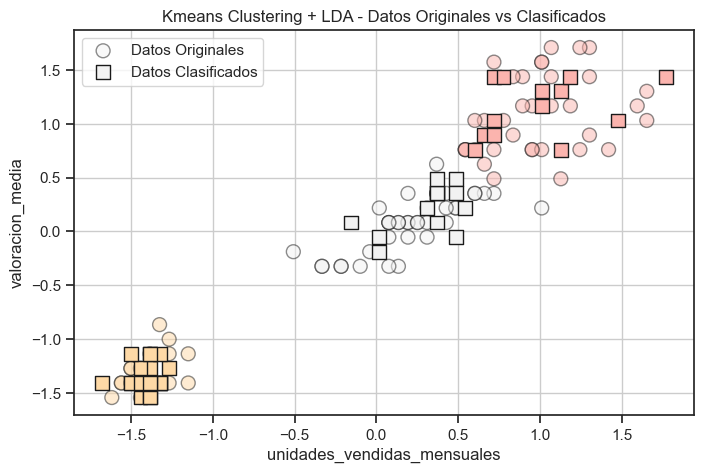

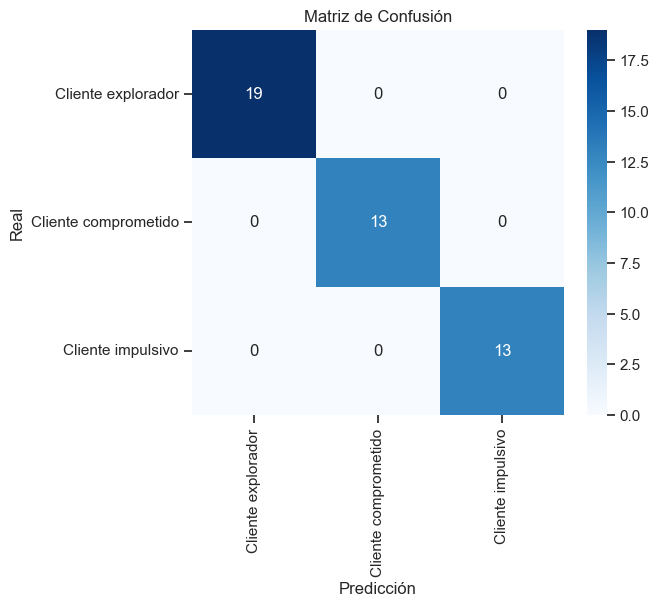

In [88]:
metodo = "kmeans" # "kmeans" o "jerarquico"
umbral = 4
n_clusters = 3
feature1 = None
feature2 = None
feature1 = "unidades_vendidas_mensuales" #precio_unitario
feature2 = "valoracion_media" #media_visitas_diarias

classifyClusteringLDA(method = metodo, umbral = umbral, n_clusters = n_clusters,
                      feature1 = feature1, feature2 = feature2, cmap = "Pastel1")

#### 📊 **<font color="#d6b302">💻 2.3.2. Entrenando y clasificando con SVM 💻</font>**

Para este ejercicio usaremos la función `classifyClusteringSVM()` que está definida en la celda de código de abajo.

<font color="#d6023a">**Consideraciones:**</font>

Para que la misma funcione correctamente, debemos pasarle los siguientes parámetros:

- `metodo`: Técnica de clustering a usar, puede ser `"kmeans"` o `"jerarquico"`. Hay que escribirlo entre comillas dobles o simples, y exactamente como está esscrito acá.
- Hay que elegir las features que se usaron para generar las categorías. Para esto, reemplaza donde dice `None` en las variables `feature1` y `feature2` por las características que hayas elegido en el apartado 2.1. Recorda que deben estar entre comillas dobles o simples y deben coincidir con las que usaste para generar las categorías. Ejemplo: `feature1 = "media_visitas_diarias"` y `feature2 = "unidades_vendidas_mensuales"`.
- `n_clusters`: Número de componentes a utilizar en LDA. Debe ser un número entero positivo.
- `umbral`: Umbral de distancia para el clustering jerárquico. Si se hace `metodo = "kmeans"`, entonces umbral no se usa.

Ejemplo usando clustering Jerárquico, un umbral de 7 y con las features "media_visitas_diarias" y "unidades_vendidas_mensuales":

```python
metodo = "jerarquico" # "kmeans" o "jerarquico"
umbral =  7
n_clusters = 3
feature1 = "media_visitas_diarias"
feature2 = "unidades_vendidas_mensuales"
```

Cantidad de clusters formados con Agglomerative Clustering y umbral 4: 3
Cantidad de datos para set de testeo y entrenamiento: 45 y 105, respectivamente
Accuracy: 100.0 %
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



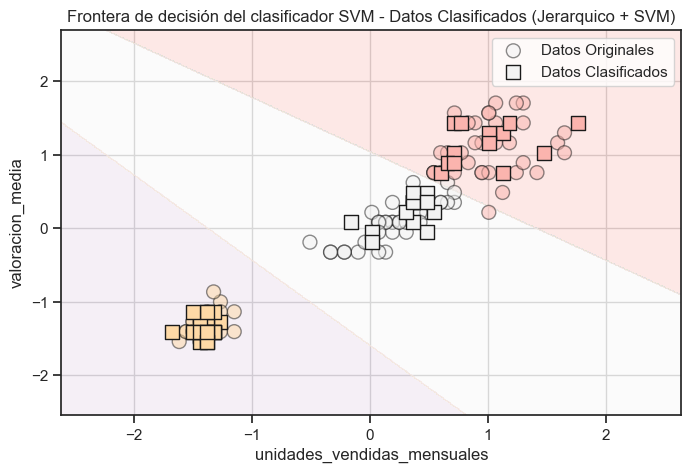

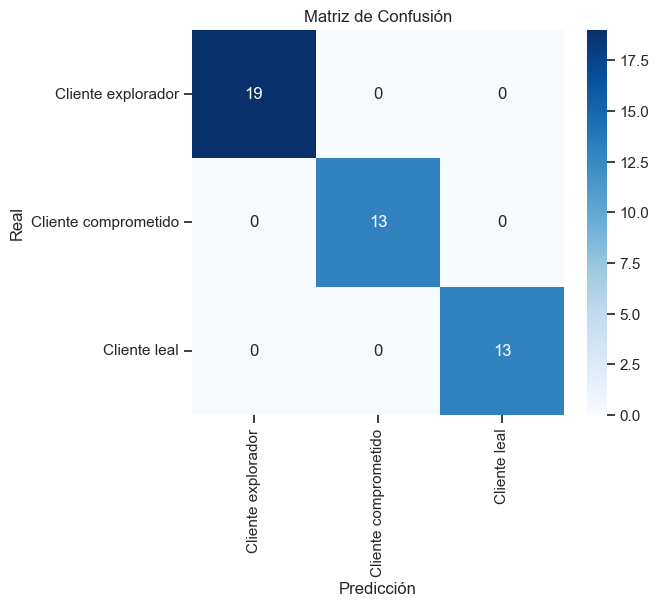

In [89]:
metodo = "jerarquico" # "kmeans" o "jerarquico"
umbral =  4
n_clusters = 3
feature1 = None
feature2 = None
feature1 = "unidades_vendidas_mensuales" #precio_unitario
feature2 = "valoracion_media" #media_visitas_diarias

classifyClusteringSVM(method=metodo, umbral=umbral, feature1=feature1, feature2=feature2,
                      n_clusters=n_clusters, seed=42, cmap="Pastel1", test_size=0.3, figsize=(8,5))

---❓---

15. ¿Qué técnica de clasificación funcionó mejor: LDA o SVM? ¿Por qué? *(Obligatoria)*
16. Cuando aplicamos LDA para clasificar a partir de dos dimensiones, ¿estas dimensiones maximizan la separabilidad de las clases a la vez que se reduce la varianza dentro de cada clase? *(Obligatoria)*

---❓---


📝 *En esta celda podes escribir las respuestas a las preguntas obligatorias número 15 y 16* 📝

15. La técnica que usaría para generar las categorías es...
16. Al aplicar LDA para clasificar lo que sucede es...

---

## 📊 **<font color="#d6b302">3. Prediciendo velocidad de venta</font>**

En este ejercicio vamos a usar un dataset que tiene las siguientes features:

- product_length_cm
- packaging_width_cm
- shelf_presence_score
- sales_velocity
- price_usd
- product_category
- customer_satisfaction

La idea es predecir la velocidad de venta (*sales_velocity*) a partir de analizar y procesar los datos.

De manera básica, lo que haremos es:
1. analizar y entender el dataset, 
2. luego vamos pre-procesar los datos,
3. aplicaremos un regresor lineal para predecir la velocidad de venta,
4. finalmente evaluaremos el rendimiento del modelo en el set de testeo.

### 📊 **<font color="#d6b302">💻 3.1 Analisis previo 💻</font>**

Como ya sabemos, es importante entender el dataset con el que vamos a trabajar. Para esto, vamos a realizar un análisis descriptivo básico del dataset de entrenamiento.

💻 Por favor, ejecuta la celda de código de abajo para realizar un análisis descriptivo básico del dataset de entrenamiento. 💻

************************************************************************
Categorías de productos en el dataset segmentado:
  product_category  count
0                B     47
1                A     46
2                C     27
************************************************************************

************************************************************************
Estadísticas descriptivas del dataset segmentado:
                       count       mean       std   min     25%   50%     75%  \
product_length_cm      120.0   5.858333  0.780173  4.30  5.2000   5.8   6.400   
packaging_width_cm     120.0   3.027500  0.438094  2.00  2.8000   3.0   3.225   
shelf_presence_score   120.0   3.842500  1.667367  1.00  1.7000   4.4   5.100   
price_usd              120.0  13.756000  7.085870  0.79  5.0925  15.7  18.990   
customer_satisfaction  120.0   2.630000  1.281779  1.00  1.0750   2.7   3.600   
product_category_A     120.0   0.383333  0.488237  0.00  0.0000   0.0   1.000   
product_c

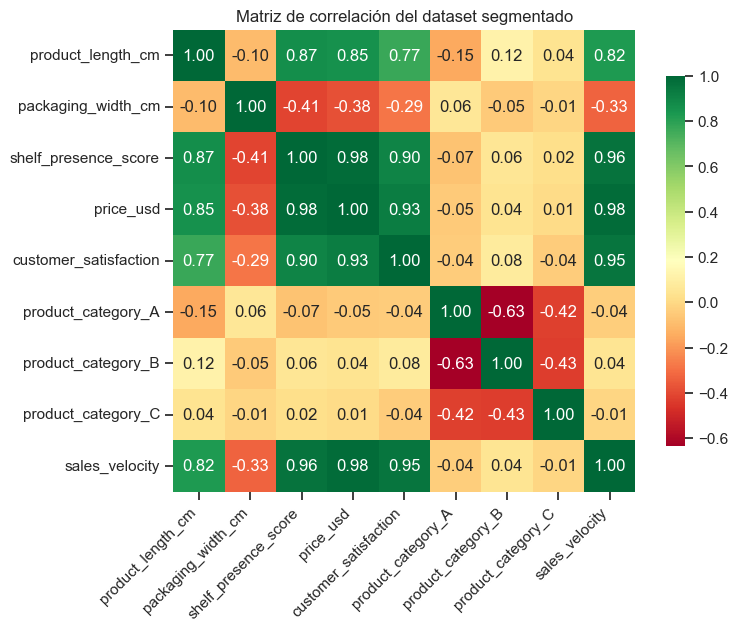

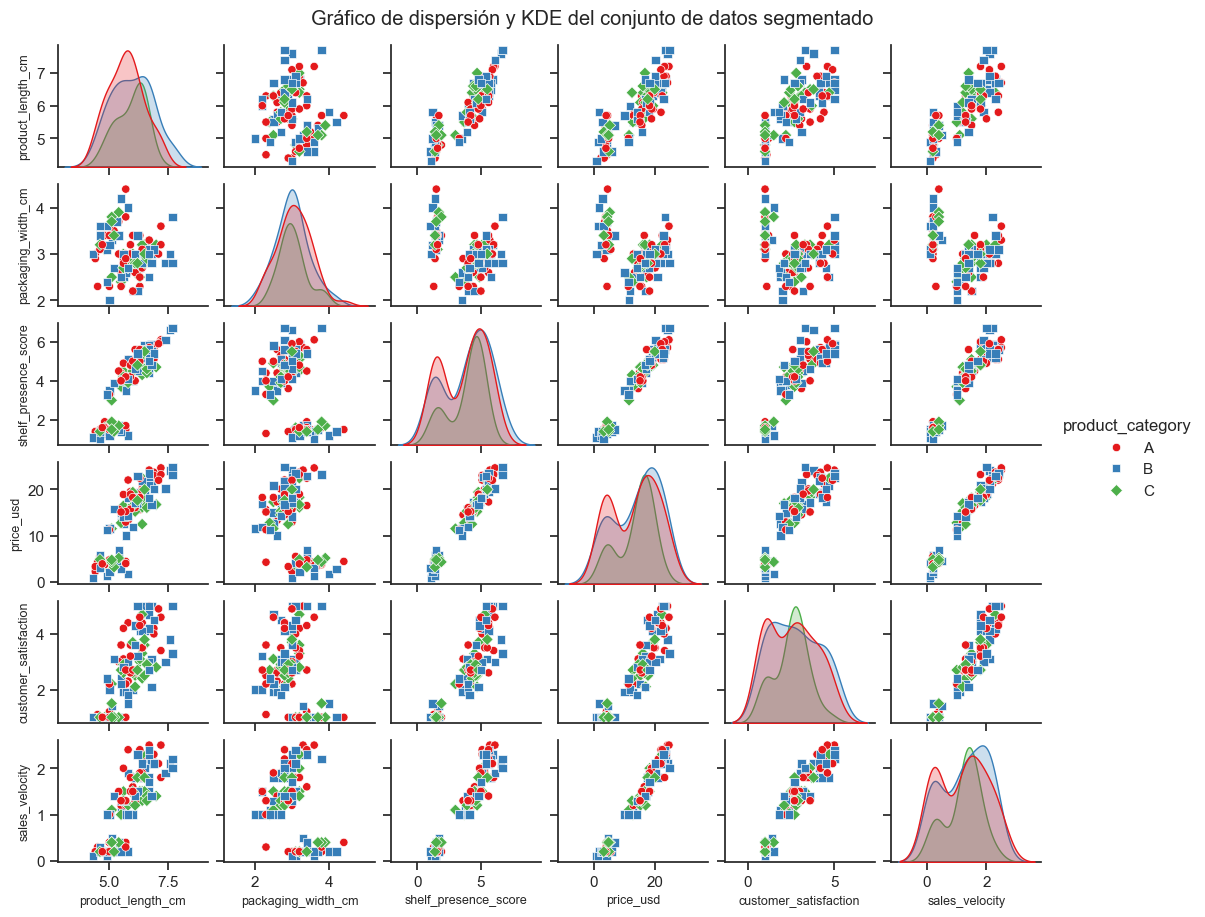

In [90]:
basicAnalysisSegmentedDataset(pairplot_height=1.5)

#### <font color="#3A40A2">📘 3.1.1. Conclusiones iniciales </font>

A partir de los datos anteriores podemos inferir algunas cosas sobre el dataset.

1. Los productos están muy solapados entre sí, si observamos el pairplot, podemos ver que las diferentes categorías de productos no están claramente separadas en el espacio de características.

2. **Multicolinealidad**: Algunas variables están muy correlacionadas entre sí, como por ejemplo *shelf_presence_score*, *price_usd* y *customer_satisfaction* ($>0.9$) están muy correlacionadas con la variable objetivo *sales_velocity*. Esto puede indicar que estas variables miden aspectos similares del producto o que están influenciadas por factores comunes. En este contexto, podráimos decir que estas variables son redundantes y podrían ser eliminadas o combinadas para simplificar el modelo. No obstante, está claro que estas variables tienen una muy alta correlación positiva, y por lo tanto, aportan información relevante para predecir la velocidad de venta dado que cuando una crece, la velocidad de venta también tiende a crecer.

3. La variable *packaging_width_cm* tiene una correlación negativa moderada con *sales_velocity* (aprox. $-0.33$), lo que sugiere que a medida que aumenta el ancho del empaque, la velocidad de ventas tiende a disminuir. Esto podría indicar que los productos con empaques más anchos son menos atractivos para los consumidores o que tienen un precio más alto. En todo caso, esta variable aporta *información distinta* y sería bueno conservarla.

4. Observando los valores de Skewness* y Kurtosis**, podemos ver que en general la distribución de las variables son relativamente simétricas, aunque algunas están algo más alejadas de una distribución normal.

* El Skewness mide la asimetría de la distribución de los datos respecto de la media. Un valor de skewness cercano a 0 indica una distribución simétrica, mientras que valores positivos o negativos indican asimetría hacia la derecha o hacia la izquierda, respectivamente.
** El Kurtosis mide la "concentración" de los datos en torno a la media. Un valor de kurtosis cercano a cero indica una distribución normal, mientras que valores positivos o negativos indican distribuciones con colas más pesadas o más ligeras, respectivamente.

---❓---

17. Respecto de la poca separabilidad entre las clases, ¿qué técnicas podríamos usar para mejorar la separación entre clases y por qué? *(Obligatoria)*
18. Respecto de la alta correlación entre algunas variables, ¿cómo podríamos hacer para juntar variables y así reducir la redundancia? *(Obligatoria)*
19. ¿Hay variables que tengan escalas muy distintas entre sí? ¿Cuáles? ¿Qué acciones podrías tomar?

---❓---

📝 *En esta celda podes escribir las respuestas a las preguntas obligatorias número 17 y 18|* 📝

17. ...
18. ...


### 📊 **<font color="#d6b302">💻 3.2 Procesando datos 💻</font>**

A continuación aplicaremos un pipeline de pre-procesamiento a los datos de entrenamiento y testeo.

Para esto, usaremos una función llamada `processSegmentedDataset()`.

Esta función admite algunas combinaciones para procesar los datos.

1. Es posible procesar los datos aplicando PCA a las columnas *'product_length_cm'*, *'shelf_presence_score'*, *'price_usd'*, *'customer_satisfaction'* para obtener nuevas componentes (por defecto 2) que reemplacen a estas variables. Esto puede ayudar a reducir la dimensionalidad y eliminar la multicolinealidad entre estas variables. Para esto, debemos pasar el parámetro `apply_pca=True` y `n_components_pca` con la cantidad de componentes que queremos obtener.  Si usamos PCA, la función aplicará escalado estándar a las columnas que no se usen en PCA y luego aplicará PCA a las columnas indicadas. La función retornará un set de datos de entrenamiento nuevo con las columnas PCA1 y PCA2 (o más si elegimos más componentes) y las demás columnas que no se usaron en PCA.
2. El set de datos original tiene una columna llamada 'product_category' que es una variable categórica. Podemos usar las variables categóricas transformadas con OneHotEncoding haciend `use_product_category=True`, si no quieremos usar esta variable, debemos pasar `use_product_category=False`.
3. En el caso de no usar PCA la función procesará todas las columnas numéricas (excepto las categóricas) aplicando escalado estándar. Sin embargo, es posible elegir una o más característica de interés. Se dejan algunos ejemplos abajo.

Supongamos que queremos aplicar PCA con 2 componentes y usar la variable categórica 'product_category'. Entonces, debemos ejecutar la función de la siguiente manera:

```python
apply_pca = True
use_product_category = True
n_components_pca = 2
features_selected = ["product_length_cm","shelf_presence_score","price_usd","customer_satisfaction"]
```

Supongamos que sólo quisieramos usar "customer_satisfaction" y no usar PCA, podríamos ejecutar la función de la siguiente manera:

```python
apply_pca = False
use_product_category = False
n_components_pca = 2
features_selected = ["customer_satisfaction"]
```

💻 Por favor, elegí lo que queres hacer y ejecuta la celda de abajo 💻

Para entender qué hace la función, podes modificar cada una de las variables según se explica. Cada vez que ejecutes la celda, se procesarán los datos de entrenamiento y se mostrará un pequeño resumen.

In [91]:
##características de itneres ["product_length_cm","shelf_presence_score","price_usd","customer_satisfaction"]
apply_pca = True
use_product_category = True
n_components_pca = 2
features_selected = ["customer_satisfaction"] ## posibles["product_length_cm","shelf_presence_score","price_usd","customer_satisfaction","packaging_width_cm"]
processSegmentedDataset(apply_pca,
                        n_components_pca,
                        use_product_category,
                        features_selected)

Aplicando StandardScaler a las variables numéricas...
Aplicando PCA a las variables numéricas altamente correlacionadas...
Características seleccionadas para PCA: ['product_length_cm', 'shelf_presence_score', 'price_usd', 'customer_satisfaction']
************************************************************************
Estadísticas descriptivas del dataset segmentado procesado:
                    count          mean       std       min       25%  \
pca_1               120.0  5.921189e-17  1.919357 -3.381850 -2.177388   
pca_2               120.0 -2.035409e-17  0.495734 -1.110232 -0.361947   
packaging_width_cm  120.0 -7.031412e-16  1.004193 -2.355220 -0.521472   
sales_velocity      120.0  9.621933e-17  1.004193 -1.548554 -1.140443   
product_category_A  120.0  3.833333e-01  0.488237  0.000000  0.000000   
product_category_B  120.0  3.916667e-01  0.490169  0.000000  0.000000   
product_category_C  120.0  2.250000e-01  0.419333  0.000000  0.000000   

                         50%       

### 📊 **<font color="#d6b302">💻 3.3 Prediciendo velocidad de venta 💻</font>**

Ahora vamos a usar un Regresor Lineal para predecir el precio de venta a partir de los datos procesados.

Al igual que antes, vas a poder decidir si usar PCA o no y si usar la variable categórica 'product_category' o no o bien elegir una o más características de interés.

LA función que usaremos para esto es `predictSalesVelocity()`. La misma nos arroja los siguientes resultados:

1. Valor $R^2$ el cual indica qué tan bien se ajusta el modelo a los datos. Un valor de $R^2$ cercano a 1 indica un buen ajuste, mientras que un valor cercano a 0 indica un mal ajuste.
2. RMSE (Root Mean Squared Error) el cual mide la diferencia promedio entre los valores predichos por el modelo y los valores reales. Un valor de RMSE más bajo indica un mejor rendimiento del modelo.
3. MAE (Mean Absolute Error) el cual mide la diferencia promedio absoluta entre los valores predichos por el modelo y los valores reales. Al igual que RMSE, un valor de MAE más bajo indica un mejor rendimiento del modelo.
4. Una tabla con los primeros 5 valores reales, los predichos, su diferencia absoluta y el error porcentual.
5. Un gráfico que muestra los valores reales vs los valores predichos en un scatter plot junto a una línea roja que representa la línea ideal donde los valores predichos son iguales a los valores reales.

Aplicando StandardScaler a las variables numéricas...
Aplicando PCA a las variables numéricas altamente correlacionadas...
Características seleccionadas para PCA: ['product_length_cm', 'shelf_presence_score', 'price_usd', 'customer_satisfaction']
Entrenando modelo: Linear Regression
Cantidad de datos para set de testeo y entrenamiento: 30 y 120, respectivamente
R²: 0.9767
RMSE: 0.1729
MAE: 0.134
Primeros 5 valores reales vs predichos:
   Real  Predicho  Diferencia Absoluta  Porcentaje de Error
0   1.3  1.316385             0.016385             1.260398
1   1.6  1.637266             0.037266             2.329100
2   0.2  0.275708             0.075708            37.854239
3   1.5  1.461302             0.038698             2.579871
4   0.2  0.205428             0.005428             2.713778


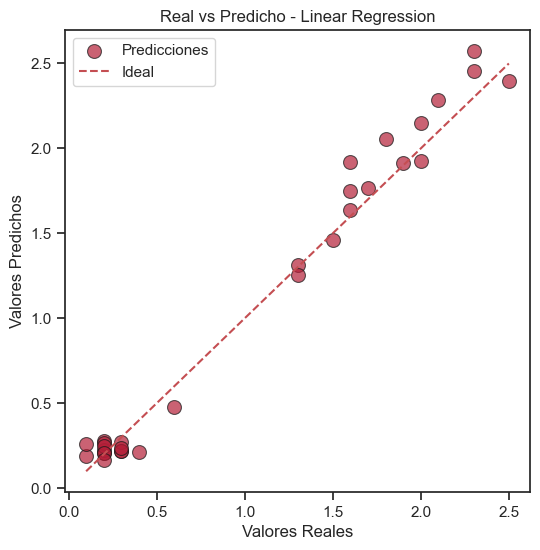

In [97]:
apply_pca = True
use_product_category = True
n_components_pca = 2
features_selected = ["packaging_width_cm"] ## posibles["product_length_cm","shelf_presence_score","price_usd","customer_satisfaction","packaging_width_cm"]

predictSalesVelocity(apply_pca,
                     n_components_pca,
                     use_product_category,
                     features_selected)

---❓---

20. En base a las métricas arrojadas por la función anterior ¿Qué tan bien funciona el modelo si se usa PCA y las variables categóricas?
21. ¿Qué tan bien funciona el modelo si se usan por ejemplo las columnas "price_usd" y "customer_satisfaction"?
22. ¿Qué tan bien funciona el modelo si sólo se usa la columna packaging_width_cm? ¿Por qué crees que arroja este desempeño? *(Obligatoria)*

---❓---

📝 *En esta celda podes escribir la respuesta a la pregunta obligatoria número 22* 📝

22. El modelo funciona...

## 📊 **<font color="#d6b302">💻 4. Clasificando categorías 💻</font>**

En este ejercicio vamos a usar el mismo dataset del ejercicio 3, el cual recordemos tiene las siguientes features:

- product_length_cm
- packaging_width_cm
- shelf_presence_score
- sales_velocity
- price_usd
- product_category
- customer_satisfaction

Con este ejercicio se buscan dos cosas:

1. Aplicar técnicas de PCA y LDA para intentar mejorar la separabilidad de los datos y mejorar la clasificación.
2. Demostrar, que a veces, no alcanza con técnicas sencillas como hemos visto y necesitamos técnicas más avanzadas.

### 📊 **<font color="#d6b302">💻 4.1 Análisis básico 💻</font>**

Al igual que antes, realizaremos un análisis básico del dataset de entrenamiento.

Por favor, ejecuta la celda de código de abajo para realizar un análisis descriptivo básico del dataset de entrenamiento.

************************************************************************
Categorías de productos en el dataset segmentado:
************************************************************************

************************************************************************
Estadísticas descriptivas del dataset segmentado:
                       count       mean       std   min     25%     50%  \
product_length_cm      104.0   5.860577  0.810779  4.30  5.1750   5.850   
packaging_width_cm     104.0   3.031731  0.446837  2.00  2.8000   3.000   
shelf_presence_score   104.0   3.845192  1.690228  1.00  1.7000   4.400   
sales_velocity         104.0   1.241346  0.747762  0.10  0.4000   1.400   
price_usd              104.0  13.759135  7.159962  0.79  4.8375  15.745   
customer_satisfaction  104.0   2.627885  1.295658  1.00  1.0000   2.700   

                         75%   max  
product_length_cm       6.40   7.9  
packaging_width_cm      3.30   4.4  
shelf_presence_score    5.10   6.7  
sales_

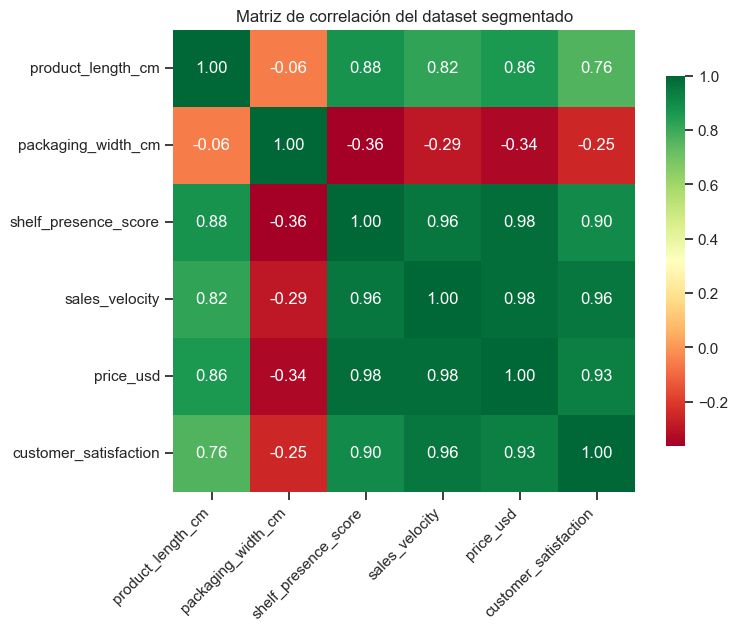

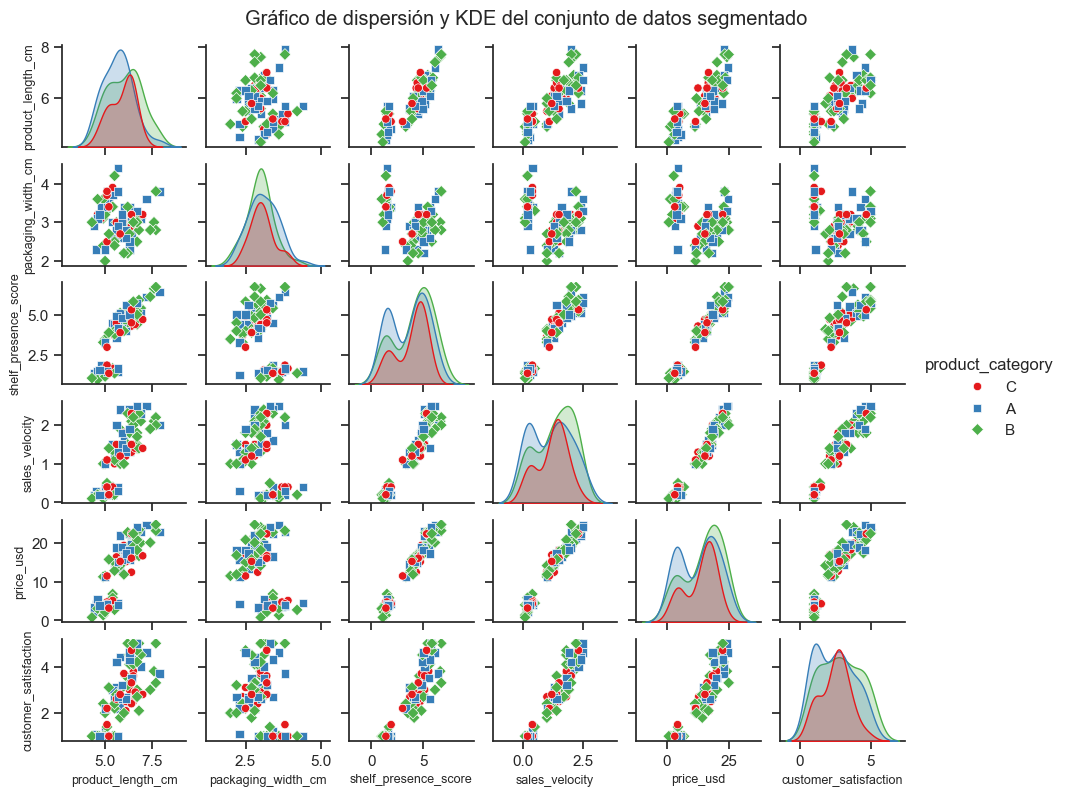

In [98]:
basicAnalysisSegmentedDataset_v2(1.3)

### 📊 **<font color="#d6b302">💻 4.2 Procesamiento básico con PCA y LDA 💻</font>**

¿Qué podemos decir acerca de la distribución de los datos? ¿Son separables las categorías? ¿Qué técnicas podríamos usar para mejorar la separabilidad de las categorías?

Veamos si aplicando PCA y LDA podemos mejorar la separabilidad de las categorías.

Para esto, usaremos la función `processSegmenDataset_v2()`.

Aplicando StandardScaler a las variables numéricas...
Aplicando PCA para reducir a 2 componentes principales...
PCA aplicado.
Varianza explicada por cada componente principal: [0.78531982 0.16118823]
Varianza total explicada por los componentes principales: 0.9465080459573358
Aplicando LDA para aumentar la separabilidad entre clases...


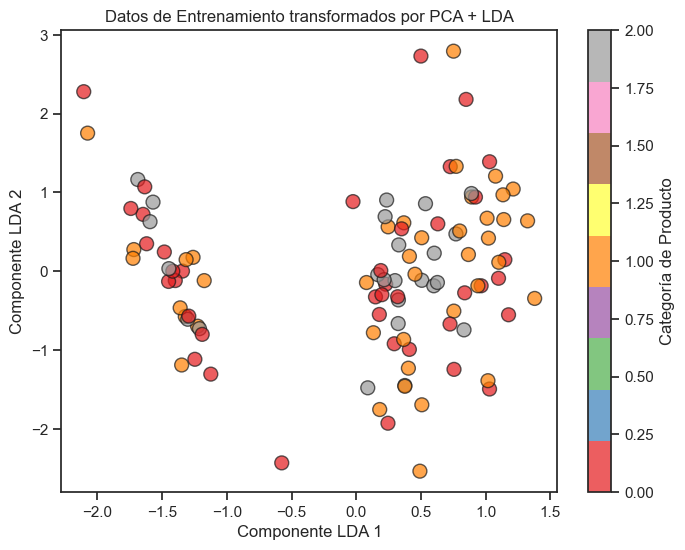

In [102]:
apply_pca = True
n_components_pca = 2
processSegmenDataset_v2(apply_pca, n_components_pca)